> ## 2020.01.22 수요일

In [61]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization, Dropout
import cv2

In [62]:
X_train = np.zeros((15*3, 24,24))
y_train = np.zeros(15*3)

for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/circle/circle{0:03d}.png'.format(i+1), 0)        
    X_train[i,:,:] = img
    y_train[i] = 0
    
for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/rectangle/rectangle{0:03d}.png'.format(i+1), 0)        
    X_train[15+i,:,:] = img
    y_train[15+i] = 1
    
for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/triangle/triangle{0:03d}.png'.format(i+1), 0)        
    X_train[30+i,:,:] = img
    y_train[30+i] = 2    

In [63]:
X_test = np.zeros((5*3, 24,24))
y_test = np.zeros(5*3)

for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test_easy/circle/circle{0:03d}.png'.format(i+16), 0)        
    X_test[i,:,:] = img
    y_test[i] = 0
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test_easy/rectangle/rectangle{0:03d}.png'.format(i+16), 0)        
    X_test[5+i,:,:] = img
    y_test[5+i] = 1
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test_easy/triangle/triangle{0:03d}.png'.format(i+16), 0)        
    X_test[10+i,:,:] = img
    y_test[10+i] = 2

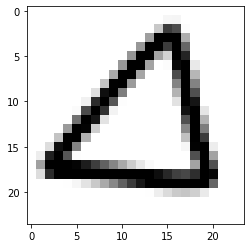

Label:  2.0


In [64]:
plt.imshow(X_test[14], cmap="gray")    # show first number in the dataset
plt.show()
print('Label: ', y_test[14])

In [65]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45, 24, 24) (15, 24, 24) (45, 3) (15, 3)


In [66]:
# 4차원으로 변경
X_train =  X_train.reshape(-1, 24,24,1)
X_test =  X_test.reshape(-1, 24,24,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45, 24, 24, 1)
(15, 24, 24, 1)
(45, 3)
(15, 3)


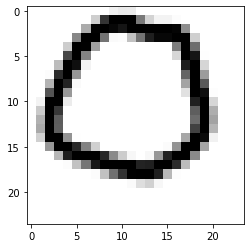

In [67]:
plt.imshow(X_train[2,:,:,0], cmap="gray")  
plt.show()

In [68]:
# 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(24,24,1)))
            #kernel_size=(5,5)이면 커널사이즈의 반만큼 양쪽으로 없어진다(?)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  
    
model.add(Conv2D(64, (3, 3))) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))                     
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(64)) 
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [69]:
# 모델 학습시키기 #1
history = model.fit(X_train, y_train, batch_size = 100, epochs = 100, 
                    validation_data =(X_test, y_test), verbose = 0)

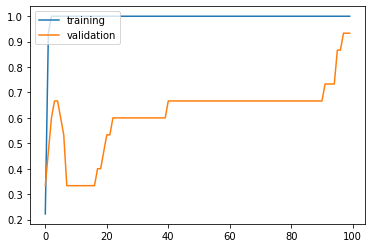

15/15 [==============================] - 0s 774us/step
[0.35473793745040894, 0.9333333373069763]


In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
results = model.evaluate(X_test, y_test)
print(results)

In [71]:
model.summary()

# Trainable params: 838,723  --- 보관해야 될 파라미터 수

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
activation_11 (Activation)   (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 9, 9, 64)          256       
_________________________________________________________________
activation_12 (Activation)   (None, 9, 9, 64)         

In [72]:
for l in model.layers:
    print(l.name)   #레이어이름은 나중에 전이학습에서 중요!
    print(l.trainable)  #학습가능한 레이어
    print("--------")

#윗부분은 Flase로 아래부분은 True로 해서 학습시켜줌...?

conv2d_7
True
--------
batch_normalization_9
True
--------
activation_11
True
--------
max_pooling2d_5
True
--------
conv2d_8
True
--------
batch_normalization_10
True
--------
activation_12
True
--------
max_pooling2d_6
True
--------
flatten_4
True
--------
dense_8
True
--------
batch_normalization_11
True
--------
activation_13
True
--------
dense_9
True
--------
batch_normalization_12
True
--------
activation_14
True
--------
dense_10
True
--------


In [73]:
w = model.layers[0].get_weights() # 첫번째층의 가중치
print(w[0].shape)
print(w[1].shape)

print(w[0][:,:,0,0]) # 학습된 필터..
print(w[1][0])

(3, 3, 1, 32)
(32,)
[[-0.01164906  0.0531459  -0.10361216]
 [-0.09466761 -0.13350043 -0.01336781]
 [-0.05819832 -0.11800562  0.07842766]]
-0.00046886512


In [74]:
model.layers[0].output
#레이어의 출력 결과. wx + b 까지 한 결과

<tf.Tensor 'conv2d_7/BiasAdd:0' shape=(None, 22, 22, 32) dtype=float32>

In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
activation_11 (Activation)   (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 9, 9, 64)          256       
_________________________________________________________________
activation_12 (Activation)   (None, 9, 9, 64)         

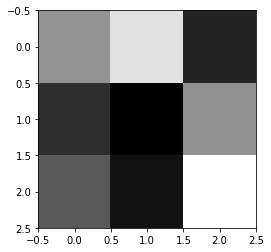

In [76]:
plt.imshow(w[0][:,:,0,0], cmap="gray")

(15, 22, 22, 32)


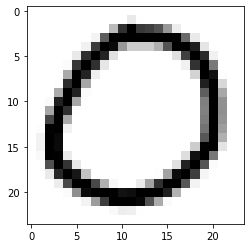

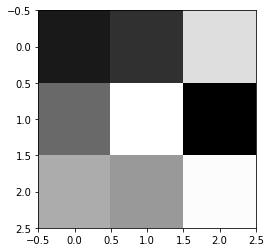

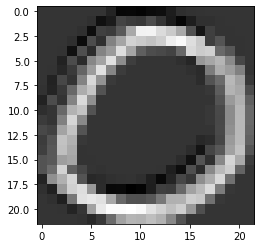

In [77]:
from keras.models import Model

my_layer_model = Model(inputs=model.input, 
                       outputs=model.layers[0].output )
output =my_layer_model.predict(X_test)

print(output.shape)

iImg = 1
iFilter = 5
# 1번 이미지
plt.imshow(X_test[iImg,:,:,0], cmap="gray")
plt.show()

# filter
w = model.layers[0].get_weights()
w = w[0]
f = w[:,:,0,iFilter]
plt.imshow(f, cmap="gray")
plt.show()

# 출력
plt.imshow(output[iImg,:,:,iFilter], cmap="gray")
plt.show()
# 인덱스1번 이미지에 6번째 필터를 적용했을때의 결과값
# 출력 = 0번째 이미지 * (0번째 필터 + b)

In [80]:
my_layer_model = Model(inputs=model.input, 
                       outputs=model.get_layer("flatten_4").output)
output = my_layer_model.predict(X_test)

print(output.shape)

(15, 1024)


In [85]:
my_layer_model = Model(inputs=model.input, 
                       outputs=model.get_layer("dense_10").output)
output = my_layer_model.predict(X_test)

print(output.shape)
#print(output)
p =np.argmax(output, axis=1)
T = np.argmax(y_test, axis = 1)

print(p)
print(T)
print(  (p == T)*1 )
print(  sum(p == T)*1 )


(15, 3)
[0 0 0 0 0 1 1 1 1 0 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
14
